## ANLY 590 HW2
## Jingyu Zhang
### NetID: JZ649

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct

### 1. Feedforward: Building a ReLU neural network

Consider the rectified linear activation function : hj = max(0, aj ).

1. Draw a network with:

• 2 inputs

• 1 hidden layers with 4 hidden units and a

• 1-class output (for binary classification)


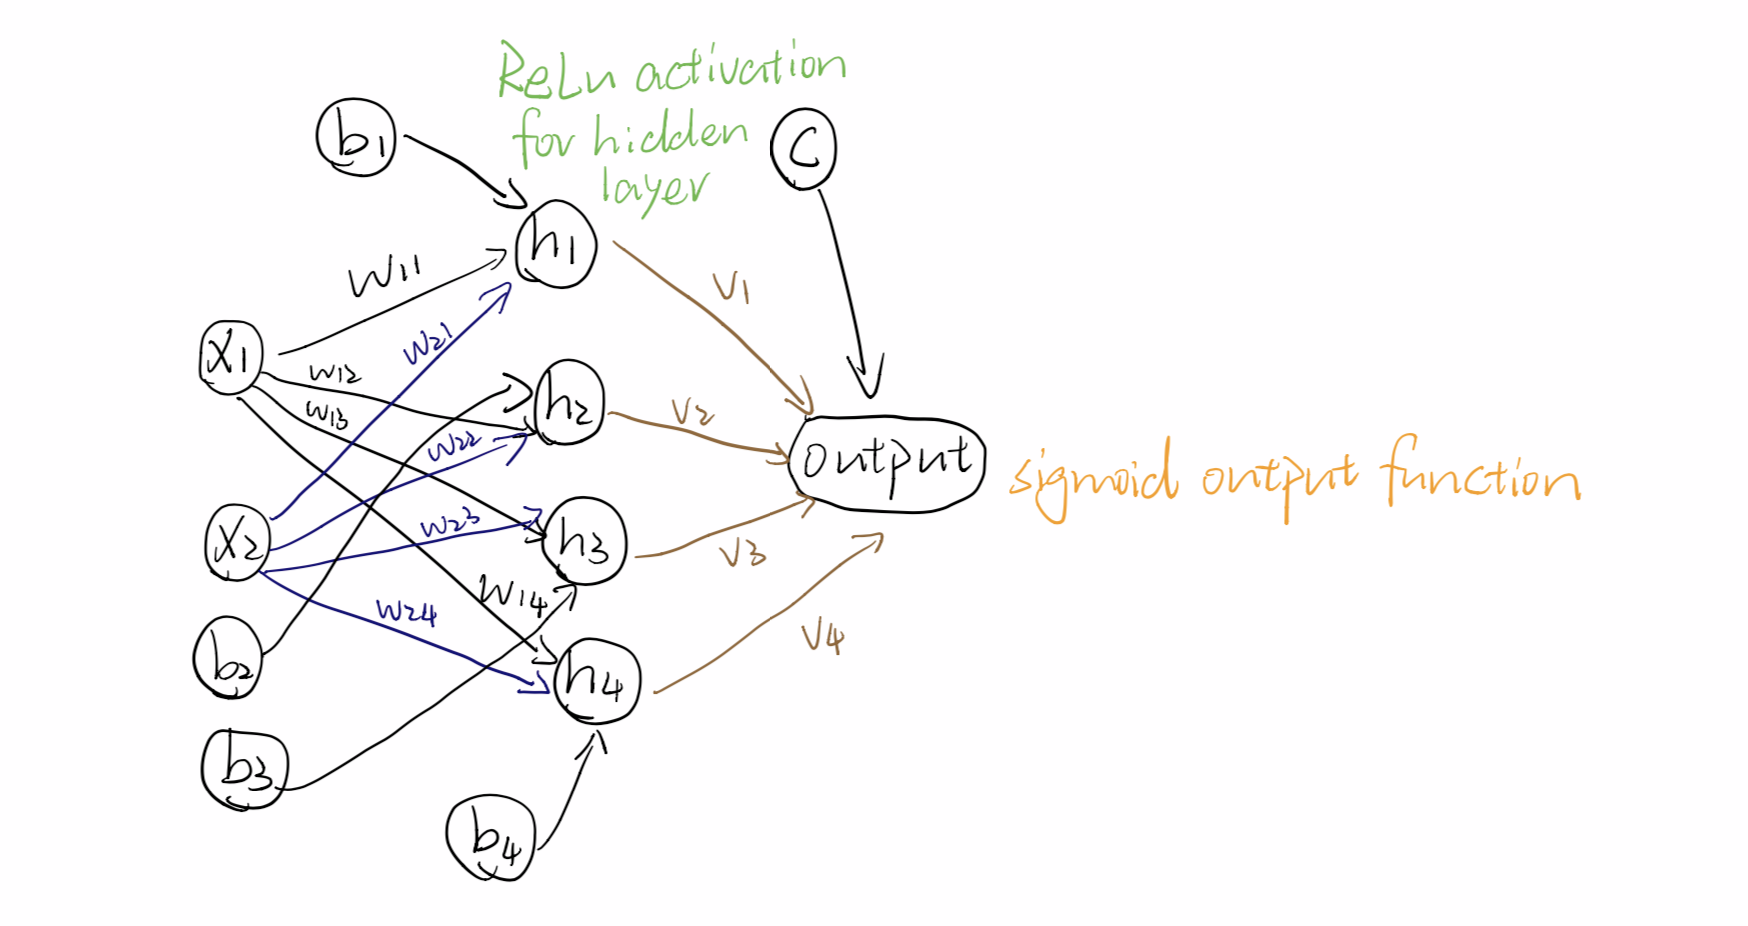

2. Write out the mathematical equation for the output of this network (feel
free to break the input-output relationship into multiple equations).



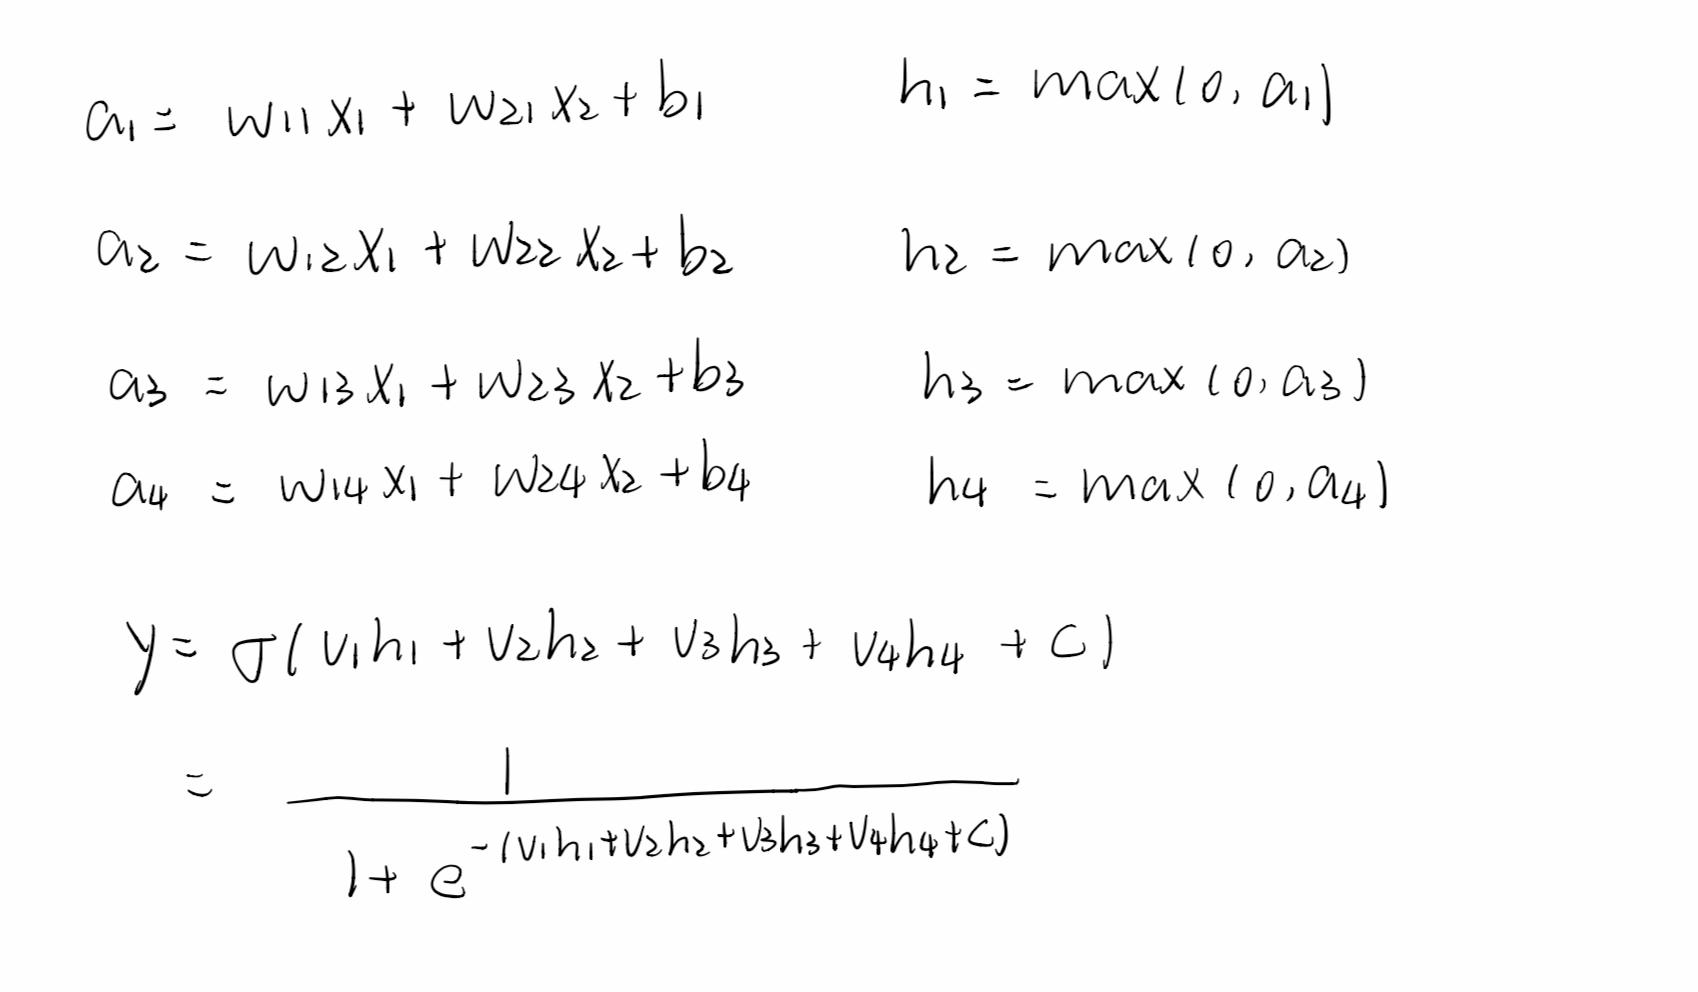

3. Write out the forward-pass function in python, call it ff nn ReLu(...)

In [2]:
def ReLu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ff_nn_ReLu(x, model_parameters):
    # unpacking the parameters
    W, V, b, c = model_parameters
    h = ReLu(np.dot(x, W) + b)
    y = sigmoid(np.dot(h, V) + c)
    return y

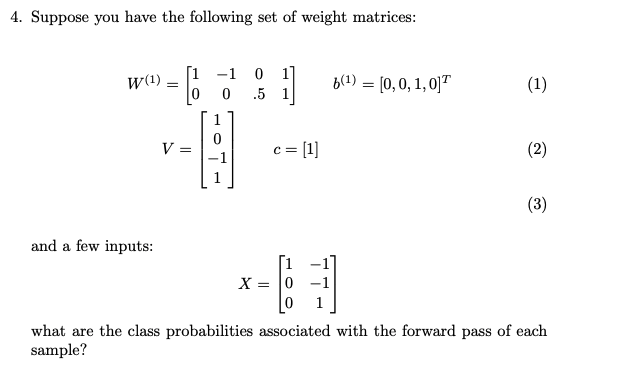

In [3]:
x = np.array([[1, -1], [0, -1], [0, 1]], np.float64).reshape((3,2))
W = np.array([[1, -1, 0, 1], [0, 0, 0.5, 1]], np.float64).reshape(2,4)
v = np.array([[1], [0], [-1], [1]], np.float64).reshape((4,1))
b = np.array([0, 0, 1, 0], np.float64).reshape(1,4)
c = np.array([1], np.float64)

# calling forward-pass
ff_nn_ReLu(x, (W,v,b,c)).reshape(1,3)

array([[0.81757448, 0.62245933, 0.62245933]])

### 2 Gradient Descent

Consider a simple non-convex function of two variables:

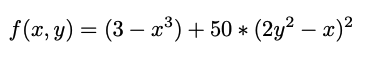

1. What are the partial derivatives of f with respect to x and to y?

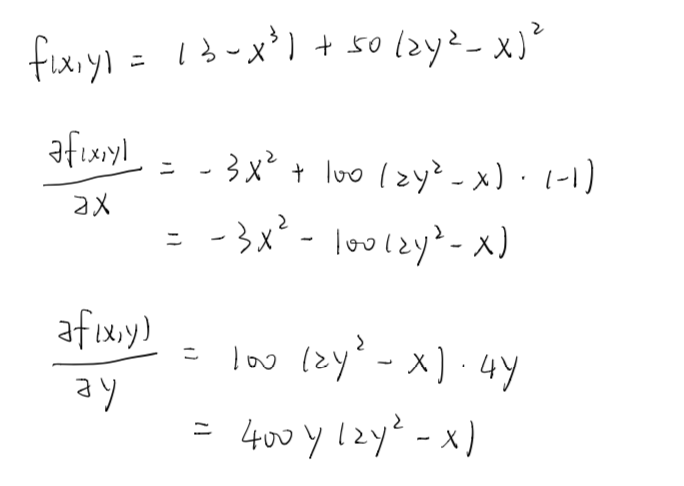

2. Create a visualization of the contours of this function.

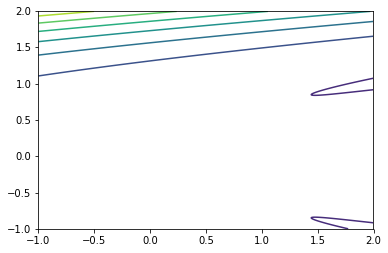

In [4]:
delta = 0.0025
x = np.arange(-1, 2, delta)
y = np.arange(-1, 2, delta)
X, Y = np.meshgrid(x, y)
Z = (3 - X**3) + 50*(2*Y**2 - X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [5]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2 - 100*(2*y**2 - x)
    df_dy = 400*y*(2*y**2 - x)
    return np.array([df_dx, df_dy])

In [6]:
def grad_descent(starting_point, iterations, learning_rate):
    
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
        
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)

    return np.array(trajectory)

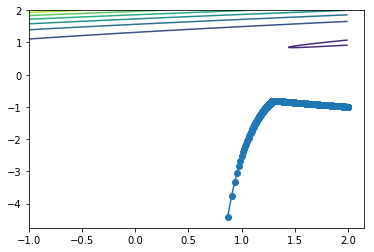

In [7]:
## learning rate = 0.00001
np.random.seed(100)
traj = grad_descent(starting_point = None, iterations = 10000, learning_rate = 0.00001)
##traj

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x = traj[0:, 0]
y = traj[0:, 1]
plt.plot(x,y, '-o')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in subtract
  if sys.path[0] == '':


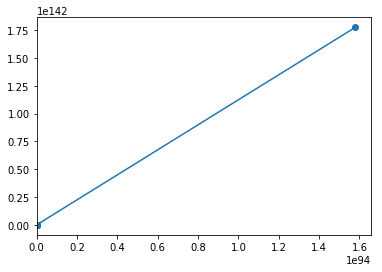

In [8]:
## learning rate = 0.001, by plotting, this learning rate is too big
np.random.seed(100)
traj = grad_descent(starting_point = None, iterations = 10000, learning_rate = 0.001)
##traj

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x = traj[0:, 0]
y = traj[0:, 1]
plt.plot(x,y, '-o')

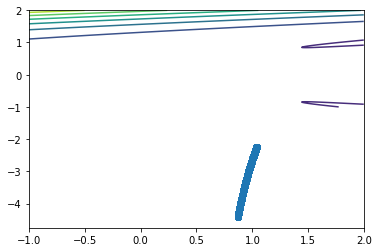

In [9]:
## learning rate = 0.00000001, by plotting, the learning rate is too small
np.random.seed(100)
traj = grad_descent(starting_point = None, iterations = 10000, learning_rate = 0.00000001)
##traj

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x = traj[0:, 0]
y = traj[0:, 1]
plt.plot(x,y, '-o')

4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s
hyperparameters.

In [10]:
def grad_descent_with_momentum(starting_point, iterations, alpha, epsilon):
    
    if starting_point:
        point = starting_point
        
    else:
        point = np.random.uniform(-10,10,size=2)
    
    trajectory = [point]
    
    v = np.zeros(point.size) # Altered to fit list attributes
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
        
    return np.array(trajectory)

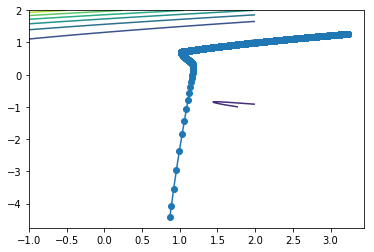

In [11]:
## alpha = 0.8, epsilon = 0.000005
np.random.seed(100)

traj = grad_descent_with_momentum(starting_point = None, iterations = 10000, alpha = 0.8, epsilon = 0.000005)
##traj

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x = traj[0:, 0]
y = traj[0:, 1]
plt.plot(x,y, '-o')

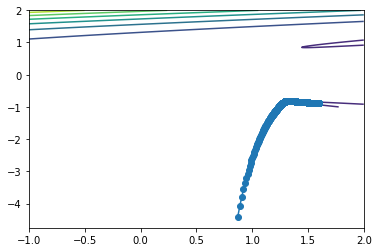

In [12]:
## alpha = 0.08, epsilon = 0.000005
np.random.seed(100)

traj = grad_descent_with_momentum(starting_point = None, iterations = 10000, alpha = 0.08, epsilon = 0.000005)
##traj

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x = traj[0:, 0]
y = traj[0:, 1]
plt.plot(x,y, '-o')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in add
  from ipykernel import kernelapp as app


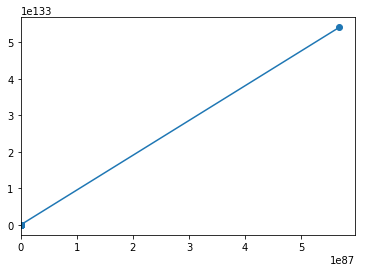

In [13]:
## alpha = 0.9, epsilon = 0.000005
np.random.seed(100)

traj = grad_descent_with_momentum(starting_point = None, iterations = 10000, alpha = 0.9, epsilon = 0.000005)
##traj

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x = traj[0:, 0]
y = traj[0:, 1]
plt.plot(x,y, '-o')

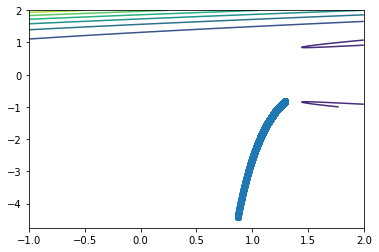

In [14]:
## alpha = 0.8, epsilon = 0.00000005
np.random.seed(100)

traj = grad_descent_with_momentum(starting_point = None, iterations = 10000, alpha = 0.8, epsilon = 0.00000005)
##traj

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x = traj[0:, 0]
y = traj[0:, 1]
plt.plot(x,y, '-o')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in add
  from ipykernel import kernelapp as app


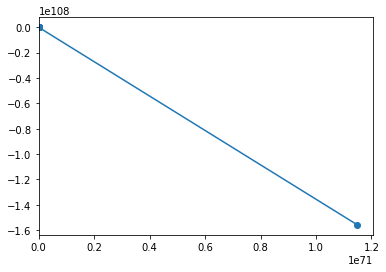

In [15]:
## alpha = 0.8, epsilon = 0.00005
np.random.seed(100)

traj = grad_descent_with_momentum(starting_point = None, iterations = 10000, alpha = 0.8, epsilon = 0.00005)
##traj

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x = traj[0:, 0]
y = traj[0:, 1]
plt.plot(x,y, '-o')

### 3 Backprop
1. For the same network as in Question 1, derive expressions of the gradient
of the Loss function with respect to each of the model parameters

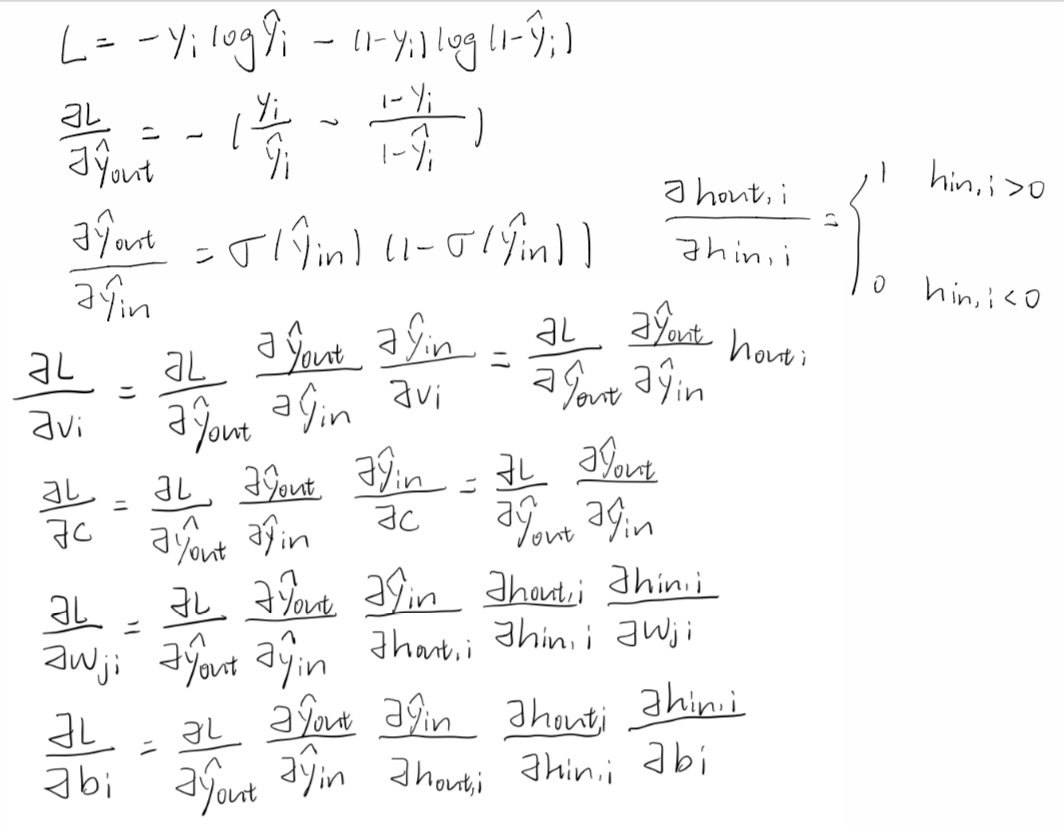

2. Write a function grad f(...) that takes in a weights vector and returns
the gradient of the Loss at that location.

In [16]:
def loss_func(y, yhat):
    return -(y * np.log(yhat) + (1 - y) * np.log(1 - yhat)).sum(),  -(y/yhat - (1-y)/(1-yhat))

def drelu(x):
    return np.where(x>0, 1, 0)

def grad_f(x, y, model_params):
    W, V, b, c = model_params
    yhat1 = ff_nn_ReLu(x, model_params)
    Loss, dLoss = loss_func(y, yhat1)
    h = ReLu(np.dot(x,W) + b)
    dc = dLoss * sigmoid(np.dot(h, V) + c) * (1 - sigmoid(np.dot(h,V) + c))
    dV = np.dot(dc.T, h).T
    db = np.where(np.dot(x,W) + b>0, 1, 0) * np.dot(dLoss, V.T)
    dW = np.dot(x.T, db)
    return Loss, np.average(dc, axis=0), dV, np.average(db, axis=0), dW

In [17]:
np.random.seed(100)
W = np.random.randn(8).reshape(2,4)
V = np.random.randn(4).reshape(4,1)
b = np.random.randn(4).reshape(1,4)
c = np.random.randn(1)

X = np.random.randn(1000).reshape((500,2))
Y = np.random.randn(500).reshape((500,1))

grad_f(X, Y, (W, V, b, c))

(237.7552937231631, array([0.29915131]), array([[ 87.4709765 ],
        [112.36467653],
        [ 92.73632242],
        [ 79.43124234]]), array([-0.1141512 ,  0.29552065, -0.43825787,  0.33018213]), array([[  44.0614675 ,  -24.6421025 ,  -29.96588119,  -64.19592612],
        [ -31.38454294,   33.53934819,  -28.290493  , -139.14059587]]))

3. Generate a synthetic dataset like the XOR pattern (see below).

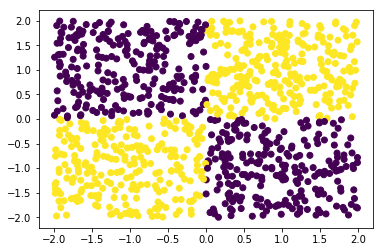

In [18]:
size = 1000

x = np.random.uniform(low=-2,high=2,size=2 * size).reshape((size,2))

y = np.zeros(size)

y = np.where(x[:, 0] * x[:, 1] >0 , 1, 0)

plt.scatter(x[:, 0], x[:, 1], c=y)

4. Fit your network using Gradient Descent. Keep track of the total Loss at
each iteration and plot the result.

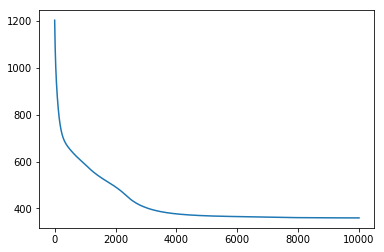

In [34]:

def grad_descent(x, y, model_params, iters, alpha):
    W, V, b, c = model_params
    yhat = ff_nn_ReLu(x, model_params)
    losses = []
    params = np.array([W, V, b, c])
    for i in range(iters):
        Loss, dc, dV, db, dW = grad_f(x, y, model_params)
        losses.append(Loss)
        grads = np.array([dW, dV, db, dc])
        params = params - grads * alpha
        model_params = params
    return losses, model_params


W = np.random.uniform(size=8).reshape(2,4)
V = np.random.uniform(size=4).reshape(4,1)
b = np.random.uniform(size=4).reshape(1,4)
c = np.random.uniform(size=1).reshape(1,1)
    
iters = 10000
learning_rate = 0.00001
Y = np.where(y, 1, 0).reshape(1000,1)
model_params = (W, V, b, c)
loss, _ = grad_descent(x, Y, model_params, iters, learning_rate)
plt.plot(loss,'-')

5. Repeat the exercise above using Momentum. Comment on whether your
algorithm seems to converge more efficiently.

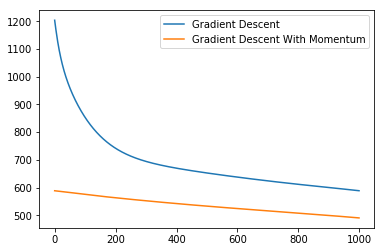

In [35]:
def gradient_descent_momentum(x,y, model_params,iters,learning_rate, alpha):
    W, V, b, c = model_params
    yhat = ff_nn_ReLu(x, model_params)
    losses = []
    params = np.array([W,V,b,c])
    Velocity = np.array([np.zeros(W.shape), np.zeros(V.shape), np.zeros(b.shape), np.zeros(c.shape)])
    for i in range(iters):
        Loss, dc, dV, db, dW = grad_f(x,y, model_params)
        losses.append(Loss)
        grads = np.array([dW, dV, db, dc])
        Velocity = alpha * Velocity + learning_rate * grads
        params = params - Velocity
        model_params = params
    return losses, params

iters = 1000
learning_rate = 0.00001
alpha = 0.015
Y = np.where(y, 1, 0).reshape(1000,1)
model_params = (W, V, b, c)
loss, model_params = grad_descent(x, Y, model_params, iters, learning_rate)
loss_mom, model_params_mom = gradient_descent_momentum(x, Y, model_params, iters, learning_rate, alpha)
plt.plot(loss,'-', label = 'Gradient Descent')
plt.plot(loss_mom, '-', label = 'Gradient Descent With Momentum')
plt.legend(loc = "upper right")

Based on this graph, the gradient descent with momentum works better.

6. Plot a visualization of the final decision boundary that your model has
learned. Overlay the datapoints in this plot.

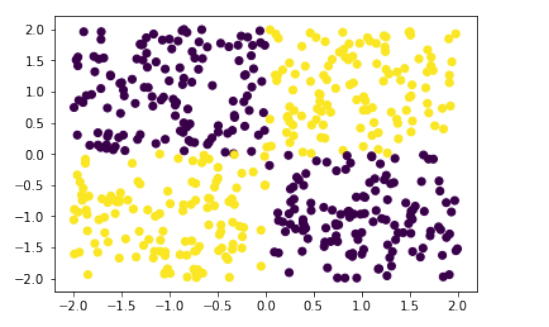

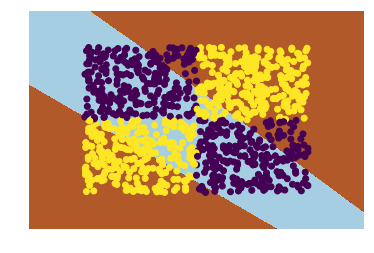

In [36]:
def plot_decision_boundaries(X, Y, model_params):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    xs = np.c_[xx.ravel(), yy.ravel()]
    ##print(xs.shape)
    Z = ff_nn_ReLu(xs, model_params)
    
    Z = np.where(Z >= 0.5, 1, 0)

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')
    plt.scatter(X[:, 0], X[:, 1], c=Y)

plot_decision_boundaries(x, y, model_params_mom)